# Day 47 - K-Nearest Neighbors Regressor

## Introduction
On Day47, I learned about the **K-Nearest Neighbors (KNN) Regressor**.  

KNN is a **non-parametric, instance-based learning algorithm**.  

Instead of learning explicit parameters like Linear Regression, KNN makes predictions by looking at the **K nearest neighbors** of a data point and taking the **average of their target values**.

This makes KNN very flexible and suitable for **non-linear datasets**, where linear models may fail.

---

## KNN Regressor: Theory

**K-Nearest Neighbors** is a non-parametric, lazy learning algorithm used for both classification and regression. Unlike models like linear regression, KNN does not learn a fixed function from the data during training. Instead, it "remembers" all the training data and performs calculations only when a new data point needs to be predicted.

**How it Works (The Core Idea):**
The fundamental principle of KNN is that "similar things are near each other."


To predict a value for a new data point, the KNN algorithm performs the following steps:

1.  **Distance Calculation**: It calculates the distance between the new data point and all the existing data points in the training set.
2.  **Find the K-Nearest Neighbors**: It identifies the `K` data points that are closest to the new point (i.e., have the smallest distance). The value of `K` is a hyperparameter that you choose.
3.  **Predict the Value**: For a regressor, the predicted value is the **average (or mean)** of the target values of those `K` neighbors.

**Choosing a Hyperparameter `K`:**

  * A small `K` (e.g., K=1) makes the model highly sensitive to noise in the data, leading to **high variance** and potential **overfitting**.
  * A large `K` makes the model too simple, potentially missing important patterns, leading to **high bias** and **underfitting**.
  * The optimal value for `K` is often found through techniques like cross-validation.

---

## Distance Metrics

The choice of distance metric is crucial for KNN. The user's notes highlight three key metrics:

  * **Euclidean Distance**: This is the most common metric. It calculates the shortest, straight-line distance between two points. It works well with dense, continuous data.
  * **Manhattan Distance**: Also known as "city block distance," it calculates the distance by summing the absolute differences of the coordinates. It's useful in cases where movement is restricted to a grid, like in a city.
  * **Cosine Distance**: This metric measures the angle between two vectors. It is very useful in high-dimensional data, especially in Natural Language Processing (NLP) and recommendation systems, where you want to find the similarity between documents or vectors regardless of their magnitude.

---

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

## Load the dataset

In [2]:
data = pd.read_csv(r'C:\Users\Arman\Downloads\dataset\emp_sal.csv')

In [3]:
data

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000
5,Region Manager,6,150000
6,AVP,7,200000
7,VP,8,300000
8,CTO,9,500000
9,CEO,10,1000000


## Separate Features and Target Variables

In [4]:
X = data.iloc[:,1:2].values
y = data.iloc[:,2].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Training the KNN Regressor
### Default n_neighbors is 5

In [7]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X,y)

KNeighborsRegressor()

## Making Predictions for level 6.5

In [8]:
knn_pred = knn_reg.predict([[6.5]])
print('Predicted Salary (k=5):',knn_pred[0])

Predicted Salary (k=5): 168000.0


## Tune Hyperparameters n_neighbors and weights

### n_neighbors = 7, weights = 'distance'

In [9]:
knn_reg7 = KNeighborsRegressor(n_neighbors=7,weights='distance')
knn_reg7.fit(X,y)

knn_pred7 = knn_reg7.predict([[6.5]])
print('Predicted Salary (k=7):',knn_pred7[0])

Predicted Salary (k=7): 232284.8664688427


### n_neighbors = 6, weights = 'distance'

In [10]:
knn_reg6 = KNeighborsRegressor(n_neighbors=6,weights='distance')
knn_reg6.fit(X,y)

knn_pred6 = knn_reg6.predict([[6.5]])
print('Predicted Salary (k=6):',knn_pred6[0])

Predicted Salary (k=6): 196521.73913043475


### n_neighbors = 3, weights = 'distance'

In [11]:
knn_reg3 = KNeighborsRegressor(n_neighbors=3,weights='distance')
knn_reg3.fit(X,y)

knn_pred3 = knn_reg3.predict([[6.5]])
print('Predicted Salary (k=3):',knn_pred3[0])

Predicted Salary (k=3): 165714.2857142857


## Plot KNN Model with k = 3

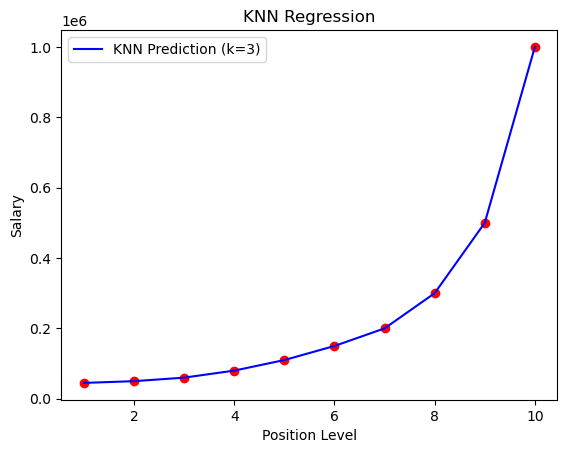

In [12]:
plt.scatter(X, y, color='red')
plt.plot(X, knn_reg3.predict(X), color='blue',label='KNN Prediction (k=3)')
plt.title("KNN Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Comparison of Predicted Salary for Level = 6.5

Using the KNN Regressor, predictions were made for **Employee Level = 6.5** with different values of K.  

| K Value | Predicted Salary |
|---------|------------------|
| 3       | 165714           |
| 5       | 168000           |
| 6       | 19652            |
| 7       | 232284           |


### Interpretation
- For **K=3**, the prediction turned out smoother and closely followed the data trend.  
- Increasing to **K=5 or 6** gave stable predictions but started averaging more points, reducing sensitivity to local variations.  
- With **K=7**, the model became the most generalized, which can sometimes underfit.  
- In this dataset, **K=3** provided the best balance of smoothness and accuracy.


---

## Summary – Day47: KNN (K-Nearest Neighbors) Regressor

On this day, I learned about the **K-Nearest Neighbors (KNN) algorithm for regression** and applied it to the Employee Salary dataset.

### Key Learnings:

* **KNN Regressor Basics**:

  * It is a **non-parametric algorithm** that makes predictions based on the average of the nearest neighbors.
  * Distance metrics (like Euclidean distance) play a key role in determining neighbors.
  * Unlike linear regression, KNN does not assume any relationship between features and target values.

* **Bias-Variance Tradeoff**:

  * **Low K (e.g., 3)** → model is sensitive to nearby points, may fluctuate more but can follow local patterns better.
  * **High K (e.g., 6 or 7)** → model becomes smoother and more generalized, but may underfit local variations.
  * Choosing an optimal K balances bias and variance.

* **Implementation**:

  * Imported and prepared the dataset (Employee Level vs Salary).
  * Split into train/test sets and trained the **KNeighborsRegressor**.
  * Tested predictions for **Employee Level = 6.5** using different K values (3, 5, 6, 7).
  * Compared predicted salaries across different K values to see the effect of changing neighbors.

* **Results & Observations**:

  * **K=3** → predictions were smoother and closer to the actual salary trend.
  * **K=5 or 6** → stable predictions, averaging more neighbors.
  * **K=7** → the most generalized prediction, risk of underfitting.
  * Demonstrated how the choice of K affects model accuracy and flexibility.

---

### Key Takeaways:

KNN Regressor is a **simple yet powerful algorithm** for non-linear regression problems.
It requires **no assumptions** about data distribution but heavily depends on the choice of **K** and **distance metric**.
This experiment showed how tuning `K` can significantly impact predictions and model performance.
